In [ ]:
# Download and unzip our videos and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq haarcascades.zip
!unzip -qq videos.zip

--2023-11-28 02:00:39--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.246.197, 52.95.148.146, 52.95.142.50, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.246.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4142728 (4.0M) [application/zip]
Saving to: ‘videos.zip’

videos.zip          100%[===================>]   3.95M  2.98MB/s    in 1.3s    

2023-11-28 02:00:41 (2.98 MB/s) - ‘videos.zip’ saved [4142728/4142728]

--2023-11-28 02:00:41--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.246.197, 52.95.148.146, 52.95.142.50, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.

In [ ]:
# HTML("""
# <video controls>
# <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define our imshow function

def imshow(title = "Image",image = None,size = 7):

  w,h = image.shape[0],image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

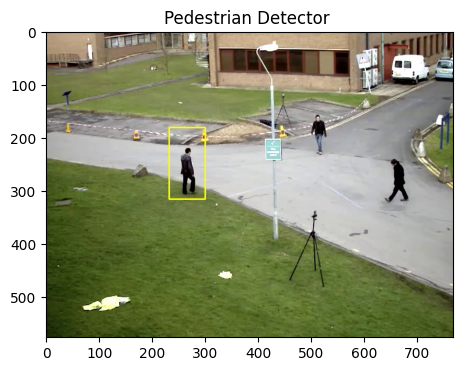

In [ ]:
# create our video capturng object
cap = cv2.VideoCapture("/content/walking.mp4")

# load our full body clasifier
body_classifier = cv2.CascadeClassifier("/content/Haarcascades/haarcascade_fullbody.xml")

# load the frame
ret,frame = cap.read()

if ret :

  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  bodies = body_classifier.detectMultiScale(gray,1.3,3)

  for (x,y,w,h) in bodies:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

cap.release()
imshow("Pedestrian Detector ",frame)


In [ ]:
# # its take lot time to do so

# cv2.videowriter(video_output_avi,cv2.video_writer("M","J","P","G"),fps,(width,height))


In [ ]:
# create our video capturng object
cap = cv2.VideoCapture("/content/walking.mp4")

w = int(cap.get(3))
h = int(cap.get(4))

# define the codec and create video writer object
out = cv2.VideoWriter("walking_output.avi",cv2.VideoWriter_fourcc("M","J","P","G"),30,(w,h))

# load our full body clasifier
body_classifier = cv2.CascadeClassifier("/content/Haarcascades/haarcascade_fullbody.xml")

while(True):

  # load the frame
  ret,frame = cap.read()

  if ret :

    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    bodies = body_classifier.detectMultiScale(gray,1.3,3)

    for (x,y,w,h) in bodies:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

    out.write(frame)
  else:
    break


cap.release()
out.release()


In [ ]:
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open("/content/walking_output.mp4","rb").read()
data_url = "data:video/mp4;base64,"+b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
<source src="%s" type="video/mp4">
</video>
""" % data_url)